In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


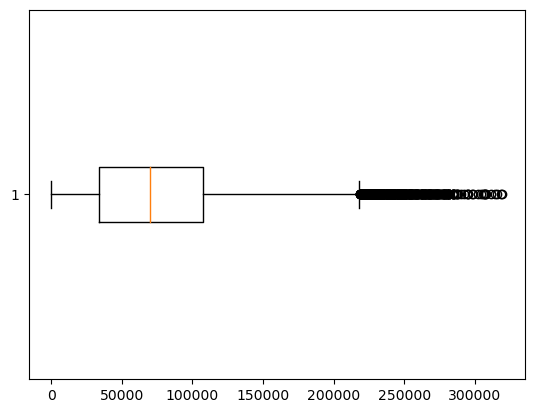

In [3]:
#            -1.5IQR   Q1   median  Q3   Q3+1.5IQR
#                       |-----:-----|
#       o      |--------|     :     |--------|    o  o
#                       |-----:-----|
#     flier             <----------->            fliers
#                            IQR

plt.boxplot(visadf['prevailing_wage'],vert=False)
plt.show()

# Orange is the median value = 50p Data
# Black dots are all outliers

$Procedure to find the outliers$
- Step 1 : Calculate Q1,Q2 and Q3
- Step 2 : Calculate Inter Quartile range Q3 - Q1
- Step 3 :
              - Calculate Upper bound = Q3+1.5*IQR
              - Calculate lower bound = Q1 -1.5*IQR
- Step 4: 
            - Find the outliers which are having greater than Upper Bound
            - Find the outliers which less than Lower Bound



- Q1 - Quartile 1 - 25p 
- Q2 - Quartile 2- 50p
- Q3 - Quartile 3 -75p

In [4]:
pwage=visadf['prevailing_wage']
q1= np.quantile(visadf['prevailing_wage'],0.25)
q2= np.quantile(visadf['prevailing_wage'],0.50)
q3= np.quantile(visadf['prevailing_wage'],0.75)
l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[q1,q2,q3]
d1=pd.DataFrame(zip(l1,l2),columns=['Till Per','count'])
d1
iqr = q3-q1
upperBound= q3+1.5*iqr
lowerBound=q1 -1.5*iqr
print("IQR:",iqr)
print("UpperBound:",upperBound)
print("lowerBound:",lowerBound)


condtion1=visadf['prevailing_wage']>upperBound
condtion2=visadf['prevailing_wage']<lowerBound
outliersdf=visadf[condtion1|condtion2]
print(len(outliersdf))

IQR: 73720.03250000002
UpperBound: 218315.56125000003
lowerBound: -76564.56875000002
427


In [5]:
def outliers(column):
    pwage=visadf[column]
    q1= np.quantile(visadf[column],0.25)
    q2= np.quantile(visadf[column],0.50)
    q3= np.quantile(visadf[column],0.75)
    l1=['Count of 25%','Count of 50%','Count of 75%']
    l2=[q1,q2,q3]
    d1=pd.DataFrame(zip(l1,l2),columns=['Till Per','count'])
    d1
    iqr = q3-q1
    upperBound= q3+1.5*iqr
    lowerBound=q1 -1.5*iqr
    print("IQR:",iqr)
    print("UpperBound:",upperBound)
    print("lowerBound:",lowerBound)


    condtion1=visadf['prevailing_wage']>upperBound
    condtion2=visadf['prevailing_wage']<lowerBound
    outliersdf=visadf[condtion1|condtion2]
    print(f'{col} has {len(outliersdf)} outliers')
    
numerical_col=visadf.select_dtypes(exclude='object').columns
for col in numerical_col:
    outliers(col)

IQR: 2482.0
UpperBound: 7227.0
lowerBound: -2701.0
no_of_employees has 22561 outliers
IQR: 29.0
UpperBound: 2048.5
lowerBound: 1932.5
yr_of_estab has 25472 outliers
IQR: 73720.03250000002
UpperBound: 218315.56125000003
lowerBound: -76564.56875000002
prevailing_wage has 427 outliers


In [6]:
pwage=visadf['prevailing_wage']
q1= np.quantile(visadf['prevailing_wage'],0.25)
q2= np.quantile(visadf['prevailing_wage'],0.50)
q3= np.quantile(visadf['prevailing_wage'],0.75)
l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[q1,q2,q3]
d1=pd.DataFrame(zip(l1,l2),columns=['Till Per','count'])
d1
iqr = q3-q1
upperBound= q3+1.5*iqr
lowerBound=q1 -1.5*iqr
print("IQR:",iqr)
print("UpperBound:",upperBound)
print("lowerBound:",lowerBound)

#Outliers
condtion1=visadf['prevailing_wage']>upperBound
condtion2=visadf['prevailing_wage']<lowerBound
outliersdf=visadf[condtion1|condtion2]
print(len(outliersdf))
#Non Outliers dataset
condtion1=visadf['prevailing_wage']<upperBound
condtion2=visadf['prevailing_wage']>lowerBound
nonoutliersdf=visadf[condtion1&condtion2]
print(len(nonoutliersdf))

IQR: 73720.03250000002
UpperBound: 218315.56125000003
lowerBound: -76564.56875000002
427
25053


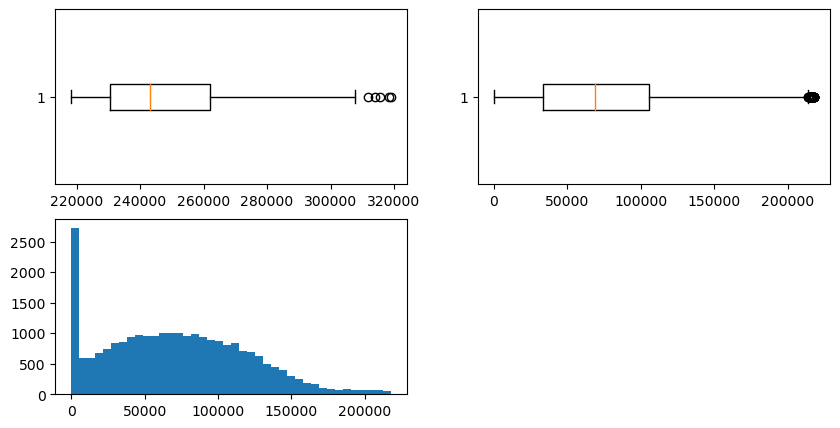

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(outliersdf['prevailing_wage'],vert=False)
plt.subplot(2,2,2)
plt.boxplot(nonoutliersdf['prevailing_wage'],vert=False)
plt.subplot(2,2,3)
plt.hist(nonoutliersdf['prevailing_wage'],bins=40)
plt.show()

In [8]:
# How to deal Outliers
- Drop the outliers based on percentage
 - if you have a very huge data 
 - and the outliers percentage is < 2, then drop the outliers
 - Drop the outliers mean, we are removing some rows all the columns
 -  In the above examples total count=25480, outliers are =427, (427*100)/25480 = 1.6
 - After removing 427 observations , we have 25053 observation(98% of data)
    
- Impute(Fill) the outliers with Median value
 - We already know that outliers doesnt affect median value
 - so if you dont want loss the data and you want fill the outliers then use median.
-Impute(Fill) with Upper bound and lowerbound values(Capping)
  - Fill the outliers with upper bound value ,which are having >  upper bound
  - Fill the outliers with lower bound value  which are having < lower bound

SyntaxError: invalid syntax (1174099232.py, line 2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
visadf

In [ ]:
# To deal with outliers we have 3 approaches
#1) Drop : But not recommended > 2%
#2) Median Value: Outliers does not affect median

#We have two sets of data 
#1) Outliers data
#2) Non Outliers data

pwage=visadf['prevailing_wage']
q1= np.quantile(visadf['prevailing_wage'],0.25)
q2= np.quantile(visadf['prevailing_wage'],0.50)
q3= np.quantile(visadf['prevailing_wage'],0.75)
l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[q1,q2,q3]
d1=pd.DataFrame(zip(l1,l2),columns=['Till Per','count'])
d1
iqr = q3-q1
upperBound= q3+1.5*iqr
lowerBound=q1 -1.5*iqr
print("IQR:",iqr)
print("UpperBound:",upperBound)
print("lowerBound:",lowerBound)

#Outliers
condtion1=visadf['prevailing_wage']>upperBound
condtion2=visadf['prevailing_wage']<lowerBound
outliersdf=visadf[condtion1|condtion2]
print(len(outliersdf))
#Non Outliers dataset
condtion1=visadf['prevailing_wage']<upperBound
condtion2=visadf['prevailing_wage']>lowerBound
nonoutliersdf=visadf[condtion1&condtion2]

outliersdf['prevailing_wage']=visadf['prevailing_wage'].median()
modified_median_outliersdf = outliersdf['prevailing_wage']

#Merginging  two dataframes important
#finaldf=pd.merge(nonoutliersdf,modified_median_outliers_df,how="outer")       #Either this step for merging the dataframe
#finaldf=pd.concat([nonoutliersdf,modified_median_outliers_df])         # Either this step for merging the dataframe
# Using Median concat for imputing and
finaldf = pd.concat([nonoutliersdf,modified_median_outliersdf])
finaldf


In [ ]:
# *****modifiying the outliers with median value so that we dont lose the data ** 
#print ("Before modifying:",outliersdf)
outliersdf['prevailing_wage']=visadf['prevailing_wage'].median()
modified_median_outliers_df = outliersdf['prevailing_wage']
#full_df = modified_median_outliers_df + nonoutliersdf # not working
#finaldf=pd.merge(nonoutliersdf,modified_median_outliers_df,how="outer")       #Either this step for merging the dataframe
#finaldf=pd.concat([nonoutliersdf,modified_median_outliers_df])         # Either this step for merging the dataframe
finaldf
 

In [ ]:
np.where
- np.where is used to fill the values based on the True condition
- 

In [ ]:
#Understanding the where condition in the pd
d1=pd.DataFrame()
d1['Name'] = ['Ramesh','Suresh','Mahesh']
d1['Age'] = [25,30,35]
#In the age column we want to replace the Age>25 with 300
condition = d1['Age'] > 25
#Where condition,if
    d1['Age'] = np.where(condition,300,d1['Age'])
d1

IQR: 73720.03250000002
UpperBound: 218315.56125000003
lowerBound: -76564.56875000002


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


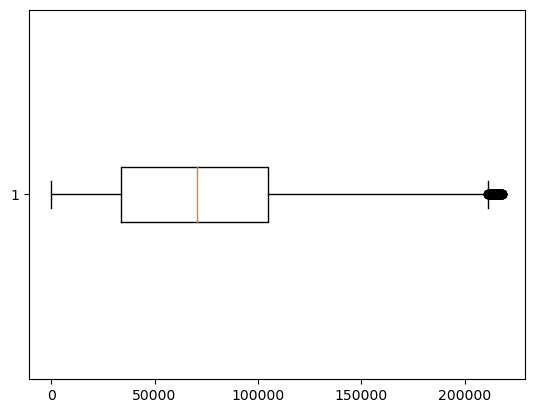

In [9]:
pwage=visadf['prevailing_wage']
q1= np.quantile(visadf['prevailing_wage'],0.25)
q2= np.quantile(visadf['prevailing_wage'],0.50)
q3= np.quantile(visadf['prevailing_wage'],0.75)
l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[q1,q2,q3]
d1=pd.DataFrame(zip(l1,l2),columns=['Till Per','count'])
d1
iqr = q3-q1
upperBound= q3+1.5*iqr
lowerBound=q1 -1.5*iqr
print("IQR:",iqr)
print("UpperBound:",upperBound)
print("lowerBound:",lowerBound)

#Outliers
condtion1=visadf['prevailing_wage']>upperBound
condtion2=visadf['prevailing_wage']<lowerBound

outliersdf=visadf[condtion1|condtion2]

median = visadf['prevailing_wage'].median()
cond=condtion1|condtion2
visadf['prevailing_wage']=np.where(cond,median,visadf['prevailing_wage'])
plt.boxplot(visadf['prevailing_wage'],vert=False)
visadf
 